# Import Classes

In [35]:
import pandas as pd
import numpy as np
import pickle

#MachineLearning
import sklearn as sk
from sklearn import model_selection as sk_ms
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

import statsmodels.api as sm

# Plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

# Import Run and Pass Data (with added fields)

In [145]:
Passes = pd.read_csv("Passes")
Runs = pd.read_csv("Runs")

Passes = Passes.set_index(['pid'])
Runs = Runs.set_index(['pid'])

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (33,47,48,49,52,53,54,55,58,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (53,54,55,58,65,87,88,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [146]:
Passes = Passes.iloc[:,1:]
Runs = Runs.iloc[:,1:]

# Import Run and Pass Models

In [38]:
modelsFolder = "C://Users//Maxwell Glassman//Documents//coding//Fantasy Football//NFL Play By Play Data//Models//"
QB_passes_filepath = modelsFolder + "QB_passes_finalized_model.sav"
QB_runs_filepath = modelsFolder + "QB_Runs_finalized_model.sav"
RB_runs_filepath = modelsFolder + "RB_Runs_finalized_model.sav"
RB_receiver_filepath = modelsFolder + "RB_receiver_finalized_model.sav"
WR_runs_filepath = modelsFolder + "WR_Runs_finalized_model.sav"
WR_receiver_filepath = modelsFolder + "WR_receiver_finalized_model.sav"
TE_receiver_filepath = modelsFolder + "TE_receiver_finalized_model.sav"

QB_passes_model= pickle.load(open(QB_passes_filepath, 'rb'))
QB_runs_model = pickle.load(open(QB_runs_filepath, 'rb'))
RB_runs_model= pickle.load(open(RB_runs_filepath, 'rb'))
RB_receiver_model = pickle.load(open(RB_receiver_filepath, 'rb'))
WR_runs_model= pickle.load(open(WR_runs_filepath, 'rb'))
WR_receiver_model = pickle.load(open(WR_receiver_filepath, 'rb'))
TE_receiver_model= pickle.load(open(TE_receiver_filepath, 'rb'))

# Predict FP for each play!

In [39]:
QB_passes = Passes[(Passes['Passer Position']=='QB')]

In [40]:
QB_passes = QB_passes[['gid','pid','Passer','Passer Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','air_yards','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Pass_FP']]

In [41]:
QB_passes = QB_passes.set_index(['gid','pid','Passer','Passer Position','off','def'])

In [42]:
QB_passes['Predicted_Passing_FP']=QB_passes_model.predict(QB_passes.iloc[:,:-1])

In [43]:
player = pd.read_csv('PLAYER.csv')
QB_runs = Runs[(Runs['Rusher Position']=='QB')]
QB_runs = QB_runs[['gid','pid','Rusher','Rusher Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rush_FP']]
QB_runs = pd.merge(QB_runs,player[['player','height','weight','forty','vertical']], how='left',left_on='Rusher',right_on='player')
QB_runs = QB_runs.drop(columns=['player'])
temp = QB_runs['Rush_FP']
QB_runs = QB_runs.drop(columns=['Rush_FP'])
QB_runs['Rush_FP'] = temp
QB_runs = QB_runs.set_index(['gid','pid','Rusher','Rusher Position','off','def'])

In [44]:
QB_runs['Predicted_Rushing_FP']=QB_runs_model.predict(QB_runs.iloc[:,:-1])

In [45]:
RB_runs = Runs[(Runs['Rusher Position']=='RB')]
RB_runs = RB_runs[['gid','pid','Rusher','Rusher Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rush_FP']]
RB_runs = RB_runs.set_index(['gid','pid','Rusher','Rusher Position','off','def'])
RB_runs['Predicted_Rushing_FP']=RB_runs_model.predict(RB_runs.iloc[:,:-1])

In [46]:
RB_receiver = Passes[(Passes['Receiver Position']=='RB')]
RB_receiver = RB_receiver[['gid','pid','Receiver','Receiver Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','air_yards','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rec_FP']]
RB_receiver = RB_receiver.set_index(['gid','pid','Receiver','Receiver Position','off','def'])
RB_receiver['Predicted_Receiving_FP']=RB_receiver_model.predict(RB_receiver.iloc[:,:-1])

In [47]:
WR_runs = Runs[(Runs['Rusher Position']=='WR')]
WR_runs = WR_runs[['gid','pid','Rusher','Rusher Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rush_FP']]
WR_runs = WR_runs.set_index(['gid','pid','Rusher','Rusher Position','off','def'])
WR_runs['Predicted_Rushing_FP']=WR_runs_model.predict(WR_runs.iloc[:,:-1])

In [48]:
WR_receiver = Passes[(Passes['Receiver Position']=='WR')]
WR_receiver = WR_receiver[['gid','pid','Receiver','Receiver Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','air_yards','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rec_FP']]
WR_receiver = WR_receiver.set_index(['gid','pid','Receiver','Receiver Position','off','def'])
WR_receiver['Predicted_Receiving_FP']=WR_receiver_model.predict(WR_receiver.iloc[:,:-1])

In [50]:
TE_receiver = Passes[(Passes['Receiver Position']=='TE')]
TE_receiver = TE_receiver[['gid','pid','Receiver','Receiver Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','air_yards','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rec_FP']]
TE_receiver = TE_receiver.set_index(['gid','pid','Receiver','Receiver Position','off','def'])
TE_receiver['Predicted_Receiving_FP']=TE_receiver_model.predict(TE_receiver.iloc[:,:-1])

# Merge all plays into one large data set

In [147]:
Passes = Passes.drop_duplicates()
Runs = Runs.drop_duplicates()

QB_passes = QB_passes.reset_index().set_index(['pid'])
QB_runs = QB_runs.reset_index().set_index(['pid'])
RB_runs = RB_runs.reset_index().set_index(['pid'])
RB_receiver = RB_receiver.reset_index().set_index(['pid'])
WR_runs = WR_runs.reset_index().set_index(['pid'])
WR_receiver = WR_receiver.reset_index().set_index(['pid'])
TE_receiver = TE_receiver.reset_index().set_index(['pid'])

concat_Runs = pd.concat([QB_runs,RB_runs,WR_runs])
concat_Receiver = pd.concat([RB_receiver,WR_receiver,TE_receiver])

Passes = Passes.join(QB_passes['Predicted_Passing_FP'])
Passes = Passes.join(concat_Receiver['Predicted_Receiving_FP'])
Runs = Runs.join(concat_Runs['Predicted_Rushing_FP'])


C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [148]:
Passes_Predictions = Passes[['gid','Passer','Passer Position','Receiver','Receiver Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','air_yards','yfog','zone','sg','nh','yds','succ','fd','pts','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Pass_FP','Predicted_Passing_FP','Rec_FP','Predicted_Receiving_FP']]

In [149]:
Runs_Predictions = Runs[['gid','Rusher','Rusher Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','air_yards','yfog','zone','sg','nh','yds','succ','fd','pts','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rush_FP','Predicted_Rushing_FP']]

In [150]:
#Setting all passes by players other than QBs to have a prediction FP of 0
Passes_Predictions[Passes_Predictions['Predicted_Passing_FP'].isnull()]['Predicted_Passing_FP']=0

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [151]:
#Set all receiving plays with either no intended target (throw aways) or receivers that are not WR, RB, TE to 0
Passes_Predictions[Passes_Predictions['Predicted_Receiving_FP'].isnull()]['Predicted_Receiving_FP']=0

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [152]:
#Set all running plays by players that are not QB/RB/WR to 0
Runs_Predictions[Runs_Predictions['Predicted_Rushing_FP'].isnull()]['Predicted_Rushing_FP']=0

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [160]:
#save to CSV
Passes_Predictions = Passes_Predictions.drop_duplicates()
#Buggy 2011 play (Pass from Drew Brees to Robert Meachem) - issue with jion
Passes_Predictions = Passes_Predictions.drop(index=[505842])
Runs_Predictions = Runs_Predictions.drop_duplicates()
Passes_Predictions.to_csv('Passes_Predictions')
Runs_Predictions.to_csv('Runs_Predictions')

# Aggregate Data to Game Level

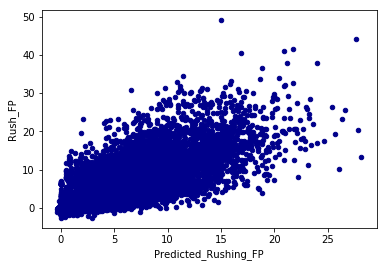

In [230]:
Runs_by_game = Runs_Predictions[['season_classified','gid','Rusher','Rusher Position','Rush_FP','Predicted_Rushing_FP']]
Runs_by_game = Runs_by_game.reset_index()
Runs_by_game['season'] = Runs_by_game['season_classified'].apply(lambda x: x+2009)
Runs_by_game = Runs_by_game.drop(columns=['pid','season_classified'])
Runs_by_game = Runs_by_game.groupby(['season','gid','Rusher','Rusher Position']).sum()
Runs_by_game.plot.scatter(x='Predicted_Rushing_FP',y='Rush_FP',c='DarkBlue')

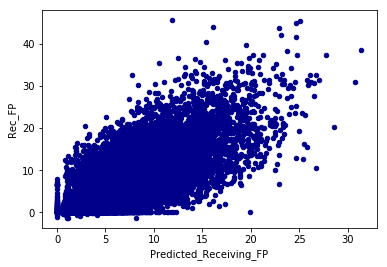

In [231]:
Receiving_by_game = Passes_Predictions[['season_classified','gid','Receiver','Receiver Position','Rec_FP','Predicted_Receiving_FP']]
Receiving_by_game = Receiving_by_game.reset_index()
Receiving_by_game['season'] = Receiving_by_game['season_classified'].apply(lambda x: x+2009)
Receiving_by_game = Receiving_by_game.drop(columns=['pid','season_classified'])
Receiving_by_game = Receiving_by_game.groupby(['season','gid','Receiver','Receiver Position']).sum()
Receiving_by_game.plot.scatter(x='Predicted_Receiving_FP',y='Rec_FP',c='DarkBlue')

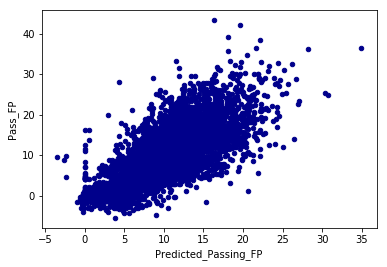

In [232]:
Passing_by_game = Passes_Predictions[['season_classified','gid','Passer','Passer Position','Pass_FP','Predicted_Passing_FP']]
Passing_by_game = Passing_by_game.reset_index()
Passing_by_game['season'] = Passing_by_game['season_classified'].apply(lambda x: x+2009)
Passing_by_game = Passing_by_game.drop(columns=['pid','season_classified'])
Passing_by_game = Passing_by_game.groupby(['season','gid','Passer','Passer Position']).sum()
Passing_by_game.plot.scatter(x='Predicted_Passing_FP',y='Pass_FP',c='DarkBlue')

In [233]:
Receiving_by_game = Receiving_by_game.reset_index()
Receiving_by_game = Receiving_by_game.rename(columns={'Receiver':'Player','Receiver Position':'Position'})

Receiving_by_game['Pass_FP'] = 0
Receiving_by_game['Predicted_Passing_FP'] = 0
Receiving_by_game['Rush_FP'] = 0
Receiving_by_game['Predicted_Rushing_FP'] = 0

Receiving_by_game = Receiving_by_game[['season','gid','Player','Position','Pass_FP','Predicted_Passing_FP','Rush_FP','Predicted_Rushing_FP','Rec_FP','Predicted_Receiving_FP']]

In [234]:
Runs_by_game = Runs_by_game.reset_index()
Runs_by_game = Runs_by_game.rename(columns={'Rusher':'Player','Rusher Position':'Position'})

Runs_by_game['Pass_FP'] = 0
Runs_by_game['Predicted_Passing_FP'] = 0
Runs_by_game['Rec_FP'] = 0
Runs_by_game['Predicted_Receiving_FP'] = 0

Runs_by_game = Runs_by_game[['season','gid','Player','Position','Pass_FP','Predicted_Passing_FP','Rush_FP','Predicted_Rushing_FP','Rec_FP','Predicted_Receiving_FP']]

In [235]:
Passing_by_game = Passing_by_game.reset_index()
Passing_by_game = Passing_by_game.rename(columns={'Passer':'Player','Passer Position':'Position'})

Passing_by_game['Rush_FP'] = 0
Passing_by_game['Predicted_Rushing_FP'] = 0
Passing_by_game['Rec_FP'] = 0
Passing_by_game['Predicted_Receiving_FP'] = 0

Passing_by_game = Passing_by_game[['season','gid','Player','Position','Pass_FP','Predicted_Passing_FP','Rush_FP','Predicted_Rushing_FP','Rec_FP','Predicted_Receiving_FP']]

In [236]:
Game_Level_Predictions = pd.concat([Passing_by_game,Runs_by_game,Receiving_by_game])

In [237]:
Game_Level_Predictions = Game_Level_Predictions.groupby(['season','gid','Player','Position']).sum()

In [238]:
Game_Level_Predictions['Total_FP'] = Game_Level_Predictions[['Pass_FP','Rush_FP','Rec_FP']].apply(sum,axis=1)
Game_Level_Predictions['Predicted_Total_FP'] = Game_Level_Predictions[['Predicted_Passing_FP','Predicted_Rushing_FP','Predicted_Receiving_FP']].apply(sum,axis=1)

In [241]:
Game_Level_Predictions.to_csv("Game_Level_Predictions")

In [239]:
Game_Level_Predictions = Game_Level_Predictions.reset_index()

In [240]:
Game_Level_Predictions[Game_Level_Predictions.Player=='TG-1950']

,season,gid,Player,Position,Pass_FP,Predicted_Passing_FP,Rush_FP,Predicted_Rushing_FP,Rec_FP,Predicted_Receiving_FP,Total_FP,Predicted_Total_FP
25149,2015,4032,TG-1950,RB,0.0,0.0,0.9,2.725434,1.0,0.909776,1.9,3.635210
25461,2015,4049,TG-1950,RB,0.0,0.0,14.6,9.327374,2.5,2.828049,17.1,12.155423
25669,2015,4060,TG-1950,RB,0.0,0.0,15.9,14.440663,0.0,0.000000,15.9,14.440663
26203,2015,4088,TG-1950,RB,0.0,0.0,24.8,11.428550,5.5,4.942232,30.3,16.370782
26420,2015,4099,TG-1950,RB,0.0,0.0,19.3,9.383215,2.8,3.740163,22.1,13.123378
26695,2015,4114,TG-1950,RB,0.0,0.0,14.9,14.147680,3.5,5.021009,18.4,19.168690
26921,2015,4126,TG-1950,RB,0.0,0.0,10.5,6.448657,5.9,3.056149,16.4,9.504806
27263,2015,4143,TG-1950,RB,0.0,0.0,11.6,14.822657,0.0,0.000000,11.6,14.822657
27468,2015,4154,TG-1950,RB,0.0,0.0,1.9,4.414799,0.0,0.996242,1.9,5.411041
27742,2015,4168,TG-1950,RB,0.0,0.0,4.1,4.183887,0.0,0.000000,4.1,4.183887
